In [24]:
import pandas as pd
import numpy as np
from os import listdir
from os.path import isfile, join
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import seaborn as sns
import cv2
import numpy as np
import matplotlib.pyplot as plt 
from skimage.color import rgb2gray
import timeit
import random
 
%matplotlib inline

In [2]:
"""Labels and images collector"""
import os
mypath = "/Users/jenifervivar/Desktop/Desktop - jenifer’s MacBook Air/Machine_learning_code/crop_part1/"
 
#mypath = '/Users/jenifervivar/Desktop/crop_part1/'#'./Data/CroppedImages'
filenames = np.array([f for f in listdir(mypath) if isfile(join(mypath, f))])
splitcolumns = [x.split('_')[0:3] + [x] for x in filenames if x.count('_') == 3]
filecolumns = ['age','gender','race','file']
filedf = pd.DataFrame(data = splitcolumns, columns = filecolumns)
filedfnona = filedf.dropna()
filedfnona['age']  = filedfnona['age'].astype(int)
filedfnona['race'] = filedfnona['race'].astype(int)
filedfnona['gender'] = filedfnona['gender'].astype(int)

#path = '/Users/jenifervivar/Desktop/UTKface_inthewild/part3'
#listing = os.listdir(mypath) 
images = []
for img in filedfnona['file']:
    image = plt.imread(mypath + img)
    #image = rgb2gray(image)
    images.append(image)

In [3]:
images[0].shape

(200, 200, 3)

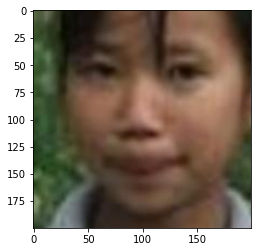

In [4]:
plt.imshow(images[0], cmap = "gray")

In [5]:
print(len(images), len(filedfnona['gender']))

9777 9777


In [6]:
import numpy as np
import cv2

"""This cell detected the faces on the images using Haar Cascade. Once the faces are detected the everything ouside the face
is black out. The problem is that some faces in the images are not recognized"""


f_cascade = cv2.CascadeClassifier(cv2.data.haarcascades +'haarcascade_frontalface_default.xml')#cv2.data.haarcascades +
#e_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
rectangles = []
masked = []
phonyimg =[]
race = []
gender = []
age = []
i = 0
for image in images:
    
#gray = cv2.cvtColor(frame, cv.COLOR_BGR2GRAY)
    #gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    #gray = cv2.equalizeHist(gray)
#faces = face_cascade.detectMultiScale(gray)
    faces = f_cascade.detectMultiScale(image, minNeighbors = 1, minSize =[100,100]) #, 1.3, 5, scalefactor=#1.2
    if type(faces)!= tuple:
       
        testImg = image
        param = faces[0]
        testImg[0:param[0]] = 0
        testImg[param[2]:200] = 0
        testImg[:, 0:param[1]]  = 0
        testImg[:, param[3]:200] = 0
        masked.append(testImg)
        race.append(filedfnona['race'][i])
        gender.append(filedfnona['gender'][i])
        age.append(filedfnona['age'][i])
        i+=1
    
    else:
        phonyimg.append(image)
        i+=1



In [7]:
print(len(masked), len(gender))

7774 7774


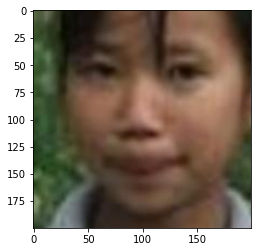

In [15]:
plt.imshow(phonyimg[0])

In [23]:
def randomForest(imagesArray, labelsToPredict):
    
    model=RandomForestClassifier()
    X_train, X_test, y_train, y_test = train_test_split(np.array(imagesArray), labelsToPredict)
    
    #flattening the images
    nsamples, nx, ny, rgb= X_train.shape
    X_train2 = X_train.reshape((nsamples,nx*ny*rgb))
    
    #only reducing X_train subset for now
    #pca = PCA(n_components = 195)
    #reduced_images = pca.fit_transform(X_train2)
    #recovered_images = pca.inverse_transform(reduced_images)
    #model.fit(recovered_images,y_train)
    model.fit(X_train2, y_train)
    #now doing the same for testing subset
    nsamples, nx, ny, rgb= X_test.shape
    X_test2 = X_test.reshape((nsamples,nx*ny*rgb))
    #reduced_images_test = pca.fit_transform(X_test2)
    #recovered_images_test = pca.inverse_transform(reduced_images_test)
    #model.fit(recovered_images_test,y_test)
    
    #y_pred=model.predict(recovered_images_test)
    y_pred = model.predict(X_test2)
    
    return y_pred, y_test

In [25]:
def confusion_plot(y_test, y_pred, title, labelsx, labelsy):
    cf_matrix = confusion_matrix(y_test, y_pred)

    ax = sns.heatmap(cf_matrix, annot=True, fmt = 'd', cmap='Blues')

    ax.set_title(title);
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
    ax.xaxis.set_ticklabels(labelsx)
    ax.yaxis.set_ticklabels(labelsy)

## Display the visualization of the Confusion Matrix.
    plt.show()

In [27]:
starttime = timeit.default_timer()
print("The start time is :",starttime)
y_pred_Haar_gender, y_test_gender = randomForest(masked, gender)
print("The time difference is :", timeit.default_timer() - starttime)

The start time is : 1128.635990875
The time difference is : 494.709375958


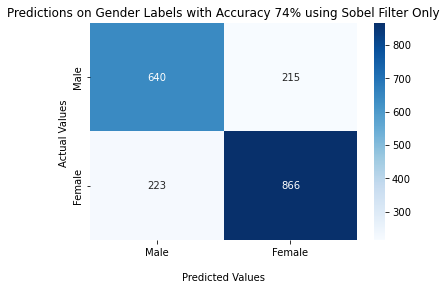

<Figure size 1080x720 with 0 Axes>

In [29]:
t = "Predictions on Gender Labels with Accuracy 77% Using Haar Cascase Mask"
x = ['Male', "Female"]
confusion_plot(y_test_gender, y_pred_Haar_gender, t, x, x)
#score = accuracy_score(y_pred_gender,y_test_gender)
fig = plt.figure(figsize=(15, 10))

In [30]:
accuracy_score(y_pred_Haar_gender,y_test_gender)
print(classification_report(y_pred_Haar_gender,y_test_gender))
print(confusion_matrix(y_pred_Haar_gender,y_test_gender))

              precision    recall  f1-score   support

           0       0.75      0.74      0.75       863
           1       0.80      0.80      0.80      1081

    accuracy                           0.77      1944
   macro avg       0.77      0.77      0.77      1944
weighted avg       0.77      0.77      0.77      1944

[[640 223]
 [215 866]]


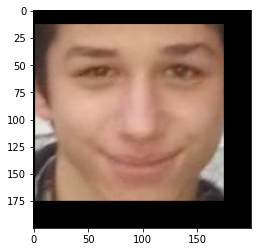

In [13]:
plt.imshow(masked[900])
plt.title("Image Masked Using Haar Cascade")

In [ ]:
plt.imshow(masked[4])
plt.show()

import cv2
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
 
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
#Read in the cascade classifiers for face and eyes
#face_cascade = cv2.CascadeClassifier('../DATA / haarcascades / haarcascade_frontalface_default.xml')
#eye_cascade = cv2.CascadeClassifier('../DATA / haarcascades / haarcascade_eye.xml')
 
 
 
# create a function to detect face
def adjusted_detect_face(img):
     
    face_img = img.copy()
     
    face_rect = face_cascade.detectMultiScale(face_img,
                                              scaleFactor = 1.1,#1.2
                                              minNeighbors = 1) #5
     
    for (x, y, w, h) in face_rect:
        cv2.rectangle(face_img, (x, y),
                      (x + w, y + h), (200, 200, 200), 10)\
         
    return face_img, face_rect
 
 

# Reading in the image and creating copies
img = images[0]
img_copy1 = img.copy()
img_copy2 = img.copy()
img_copy3 = img.copy()
 
# Detecting the face
face, magnitude = adjusted_detect_face(img_copy1)
plt.imshow(face)
print(magnitude)
# Saving the image
#cv2.imwrite('face.jpg', face)

import numpy as np
import cv2
f_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
e_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
image = cv2.imread((mypath + img))
#gray = cv2.cvtColor(frame, cv.COLOR_BGR2GRAY)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray = cv2.equalizeHist(gray)
#faces = face_cascade.detectMultiScale(gray)
faces = f_cascade.detectMultiScale(gray) #, 1.3, 5
print(faces)